In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

llm=ChatGroq(model="llama-3.1-8b-instant")

result=llm.invoke("HEllo!")
result


AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 39, 'total_tokens': 49, 'completion_time': 0.011184675, 'prompt_time': 0.002445738, 'queue_time': 0.054092451, 'total_time': 0.013630413}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c54ae48ece', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--c91c1866-5d4e-4162-beca-9a3882806523-0', usage_metadata={'input_tokens': 39, 'output_tokens': 10, 'total_tokens': 49})

In [4]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display

class State(TypedDict):
    topic:str
    story:str
    improved_story:str
    final_story:str



def generate_story(state:State):
    msg=llm.invoke(f"Write a one sentecnce story premise about {state["topic"]}")
    return{"story":msg.content}

def check_conflict(state:State):
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail"
    return "Pass"

def improved_story(state:State):
    msg=llm.invoke(f"Enhance the story premice with vivid details : {state["story"]}")
    return {"improved_story":msg.content}

def polish_story(state:State):
    msg=llm.invoke(f"Add an unexpected twist to this story premise :{state["improved_story"]}")
    return {"final_story":msg.content}



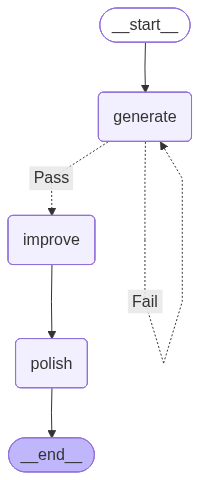

In [10]:
graph=StateGraph(State)
graph.add_node("generate",generate_story)
graph.add_node("improve",improved_story)
graph.add_node("polish",polish_story)

#Define the edges

graph.add_edge(START,"generate")
graph.add_conditional_edges("generate",check_conflict,{"Pass":"improve","Fail":"generate"})
graph.add_edge("improve","polish")
graph.add_edge("polish",END)

compiled=graph.compile()

g_i= compiled.get_graph().draw_mermaid_png()
display(Image(g_i))

In [11]:
#Run the graph

state={"topic":"Space Exploreation"}
res=compiled.invoke(state)
res

{'topic': 'Space Exploreation',
 'story': 'As humanity\'s first interstellar mission, the starship "Aurora" embarks on a perilous 20-year journey to explore the distant exoplanet Kepler-62f, a potentially habitable world that could hold the key to the existence of alien life and unlock the secrets of the universe.',
 'improved_story': 'In the year 2178, humanity\'s most ambitious undertaking yet was set to embark on a perilous 20-year journey across the vast expanse of space. The starship "Aurora" stood tall and proud, her sleek, silver hull glinting in the bright lights of the Kennedy Space Center\'s launchpad. The air was electric with excitement as the world watched the culmination of decades of tireless work by scientists, engineers, and astronauts who had dedicated their lives to this mission.\n\nThe "Aurora" was a marvel of modern engineering, a technological behemoth that stretched over 1,000 feet in length and 200 feet in width. Her massive solar panels, resembling giant wings,

In [12]:
print("Improved Story")
print(res["improved_story"])

Improved Story
In the year 2178, humanity's most ambitious undertaking yet was set to embark on a perilous 20-year journey across the vast expanse of space. The starship "Aurora" stood tall and proud, her sleek, silver hull glinting in the bright lights of the Kennedy Space Center's launchpad. The air was electric with excitement as the world watched the culmination of decades of tireless work by scientists, engineers, and astronauts who had dedicated their lives to this mission.

The "Aurora" was a marvel of modern engineering, a technological behemoth that stretched over 1,000 feet in length and 200 feet in width. Her massive solar panels, resembling giant wings, were designed to harness the energy of the stars, while her cutting-edge fusion reactors provided the power needed to propel her through the void. The ship's hull was a latticework of interlocking modules, each one a self-contained ecosystem that supported the crew's every need.

As the final countdown began, the crew of 20 

In [14]:
print("Final Story")
print(res["final_story"])

Final Story
But as the "Aurora" sailed through the cosmos, a strange phenomenon began to manifest. The ship's advanced sensors and instruments picked up an unusual energy signature emanating from the heart of the galaxy. The energy signature seemed to be resonating at a frequency that synchronized with the ship's own quantum entanglement generators, which were designed to maintain a stable wormhole for faster-than-light travel.

At first, the crew thought it was just a glitch, but as they continued to monitor the energy signature, they realized that it was, in fact, a deliberate signal. The signal was being transmitted from an unknown source, and it seemed to be guiding the "Aurora" towards an uncharted region of space.

As the crew analyzed the signal further, they discovered that it was not a natural phenomenon, but rather a message from an advanced civilization that had been hiding in plain sight. The civilization, known as the " Architects," had been observing humanity for centurie